#### Interpolación

Dados $n+1$ puntos distintos $x _{0}, x _{ 1} , ..., x _{ n}  $ y conocidos los valores $f(x _{0}), f(x _{ 1} ), ..., f(x _{n} ) $, se busca un polinomio $P(x)$ de grado $\leq n$ tal que: 

$$f(x _{0}) = P(x _{0} ), \quad f(x _{1}) = P(x _{1} ), \quad \dots , \quad f(x _{n}) = P(x _{n} )  $$

#### Interpolación de Lagrange

Construcción de polinomio de grado $n$ que pasa por $n+1$ puntos distintos $x _{0}, x _{ 1} , ..., x _{ n}  $.

Sea $$A(x) = (x-x _{0})(x- x _{ 1} ) \cdots (x - x _{ n} ) =\displaystyle \prod _{j=0} ^{ n} (x-x _{ j} )  $$

$A(x)$ tiene un cero simple en cada $x _{j} $.

Sea $$A _{k}(x) = \displaystyle \prod _{j=0,\ \  j\neq k}  ^{ n}  (x - x _{ j} )  $$ 

Note que $x _{k} $ no es un cero de $A _{k } (x)$. También note que $\displaystyle \frac{A _{k } (x) }{A _{k } (x _{k} )} $ es un polinomio que asume el valor $1$ cuando $x = x _{k } $ y que asume el valor $0$ cuando $x = x _{ j}$ con $x _{ j} \neq x _{k } $     

Es así como $$\displaystyle P(x) = \displaystyle \sum _{k=0} ^{ n} \frac{f(x _{k } ) A _{k } (x)}{A _{k } (x _{k } )}  $$
es un polinomio de grado $\leq n$ tal que $f(x _{ j} ) = P(x _{ j} ), \quad \forall j=0, 1, \dots , n$ 

Otra forma de escribir a $P(x)$ es $$\displaystyle \sum _{k=0} ^{ n} \left [ f(x _{k } ) \prod _{j=0, \ \ j\neq k}  ^{ n} 
\frac{x - x _{ j} }{x _{k } - x _{ j} } \right ]  $$ 







In [1]:
import sympy as sy

def cardinal(X, k):
    """
    ENTRADAS: X lista de floats distintos. k: entero
    SALIDA: Expresión simbólica de sympy. Polinomio cardinal.
    """
    x = sy.symbols('x')
    n = len(X) - 1
    numeradores = [x - X[j] for j in range(n+1) if j != k]
    denominadores = [X[k] - X[j] for j in range(n+1) if j != k]
    return sy.prod(numeradores) / sy.prod(denominadores)

def interpola_Lagrange(X, Y):
    """
    ENTRADAS: X, Y son las listas [x0, x1, ..., xn] y [y0, y1, ..., yn]     
    SALIDA: Expresión simbólica de sympy. Polinomio de interpolación
    """
    n = len(X) - 1
    x = sy.symbols('x')
    cardinales = [cardinal(X, k) for k in range(n+1)]
    productos = [yk * card for yk, card in zip(Y, cardinales)]
    return sum(productos)

def polinomio_interpolacion_Lagrange(X, Y):
    """
    ENTRADAS: X, Y son las listas [x0, x1, ..., xn] y [y0, y1, ..., yn]     
    SALIDA: Función de Python. Polinomio de interpolación
    """
    n = len(X) - 1
    x = sy.symbols('x')
    return sy.lambdify(x, interpola_Lagrange(X, Y), "numpy")



In [2]:
X = [-1,0, 1, 2]
Y = [4, -6, 7, 1]
x = sy.symbols('x')
interpola_Lagrange(X, Y)

-2*x*(x - 2)*(x - 1)/3 - 7*x*(x - 2)*(x + 1)/2 + x*(x - 1)*(x + 1)/6 - 3*(x - 2)*(x - 1)*(x + 1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def grafica_polinomio(P, xmin, xmax, **kwargs):
    dom = np.linspace(xmin, xmax)
    ax = plt.gca()
    ax.plot(dom, P(dom), **kwargs)

def grafica_puntos(x_s, y_s, **kwargs):
    ax = plt.gca()
    ax.scatter(x_s, y_s, **kwargs)

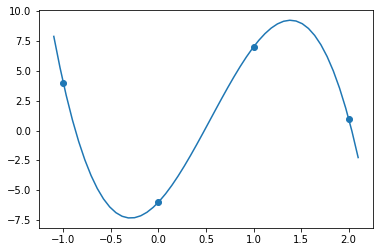

In [4]:
# Creación de gráficos de polinomio de interpolación y de puntos
#  de interlolación en un mismo sistema de ejes
fig, ax = plt.subplots()
P = polinomio_interpolacion_Lagrange(X, Y)
xmin, xmax = -1.1, 2.1
grafica_polinomio(P, xmin, xmax)
grafica_puntos(X, Y)
plt.show()

**Taller: Interpolación de Lagrange**

 En cada caso encuentre el polinomio $P$ de menor grado posible que satisface las condiciones:
  
a) $\ P(-1)=0$, $P(0)=2$, $P(2) = 7$.

b) $\ P(1)=1$, $P(2)=0$, $P(3) =0$, $P(4) =1$.

c) $\ P(1)=1$, $P(2)=2$, $P(3) =3$, $P(0) =1$.

d) $\ P(0)=-2$, $P(1)=0$, $P(-1) =-2$, $P(2) =16$.

e) $\ P(-2)=11$, $P(-1)=-11$, $P(0) =-5$, $P(1) =-1$.
  

 Sea $f(x) = \cos(\pi x/4)$. Encuentre el polinomio $P$ de menor grado posible que toma los mismos valores que $f$ en los puntos $-2, -4/3, 0, 4/3, 2$. Luego grafique sobre un mismo sistema de ejes a $f$ y a $P$.

 Sea $f(x) = \sin(\pi x/4)$. Encuentre el polinomio $P$ de menor grado posible que toma los mismos valores que $f$ en los puntos $-2, -4/3, 0, 4/3, 2$. Luego grafique sobre un mismo sistema de ejes a $f$ y a $P$.

 Sea $f(x) = \log _{4}(x) $.  Encuentre el polinomio $P$ de menor grado posible que toma los mismos valores que $f$ en los puntos:

a)    $x=1, 64$.

b)    $x=1, 16, 256$.

c)    $x=4, 16, 64$.

d)    $x=1, 4, 16, 64, 256$.


En cada caso calcule la diferencia $f(32)-P(32)$. ¿Se puede concluir que con la interpolación en general mejora la aproximación al aumentar el número de puntos de interpolación?



#### Interpolación de Chebyshev

Un problema natural que surge en la teoría de aproximación por polinomios interpolando es el de acotar el error de aproximación, es decir 
$$f(x) -P(x) = \displaystyle \frac{A(x)}{(n+1)!} f^{(n+1)}(c), \quad \text{con} \quad A(x) = (x-x _{0} )(x - x _{ 1} ) \cdots (x - x _{ n} )  $$

Allí $P$ es el polinomio de grado $\leq n$ que coincide con $f$ en los $n+1$ puntos distintos $x _{0}, x _{ 1} , \dots , x _{ n} \in [a,b] $. Asumiendo que $f$ posee derivada de orden $n+1$ sobre $[a,b]$, existe un tal $c$ en $[a, b]$. Para acotar el error se requieren cotas para la derivada $f ^{(n+1)} $ y para el producto $A(x)$. Dado que $A$ es un polinomio (continua en $[a,b]$), asume máximo en $[a,b]$ y dicho máximo tiene dependencia de la selección de puntos $x _{0}, x _{1},\dots x _{ n}    $, luego se busca seleccionar los puntos de tal forma que minimicen el máximo de $A$ sobre $[a,b]$. Este problema ha sido resuelto por Chebyshev.   



**Polinomios de Chebyshev**

Sea $x+iy$ un complejo de módulo $1$. Por teorema de binomio se tiene:
$$(x+iy) ^{ n} = \displaystyle \sum _{k=0} ^{ n} {n \choose k} x ^{n-k}(iy) ^{ k}, \quad \quad (1)   $$  

Por otro lado si tomamos $x = \cos \theta, \ y = \sin \theta$ y usamos la fórmula de Moivre, tenemos:
$$(x+iy) ^{ n} = (\cos \theta + i \ \sin \theta) ^{ n} = \cos n \theta + i\ \sin n \theta, \quad \quad (2)$$ 

La parte real en $(1)$ es la suma sobre los pares en $(2)$, luego
$$\cos \ n \theta = x ^{ n} - {n \choose 2} x ^{n-2} y ^{ 2} + {n \choose 4} x ^{n-4}y ^{4} - \cdots + \cdots, \quad \quad (3)   $$ 

Dado que $y ^{ 2} = \sin ^{ 2} \theta = 1 - \cos ^{ 2} \theta = 1 - x ^{ 2} $, al sustituir en lado derecho de $(3)$, obtenemos la forma del llamado polinomio de Chebyshev $T _{ n} (x)$:
$$T _{ n} (x) = \displaystyle \sum _{k=0} ^{[n/2]} {n\choose 2k} x ^{n-2k}(x ^{ 2} -1) ^{k}    $$  

Si $-1\leq x \leq 1$, la consideración $x = \cos \theta$ que equivale a $\theta = \arccos x$, puede ser reemplazada en $(2)$ y concluirse que $T _{ n} (x) = \cos (n \ \arccos x)$. Además, se consigue la siguiente fórmula de recursión:
$$T _{n+1}(x) = 2xT _{ n} (x) - T _{n-1}(x), \quad \text{para} \quad n\geq 1, \quad \text{con} \quad T _{0}(x) = 1 \quad \text{y} \quad T _{ 1} (x) = x   $$   
Y ello se debe a que bajo el supuesto $x = \cos \theta$,  la identidad trigonométrica 
$$\cos \ (n+1)\theta + \cos \ (n-1)\theta = 2\ \cos \theta \cos n\theta$$  
equivale a
$$T _{n+1}(x) + T _{n-1} (x) = 2x T _{n}(x), \quad \quad \text{para} \quad -1\leq x\leq 1   $$

Los siguientes son algunos ejemplos de polinomios de Chebyshev:

$T _{ 2} (x) = 2 x ^{ 2} -1, \quad T _{3}(x) = 4x ^{3} - 3x, \quad 
T _{4}(x) = 8 x ^{4} - 8 x ^{ 2} + 1, \quad T _{5}(x) = 16x ^{5} - 20 x ^{3} + 5x $ 

Se nota que los coeficientes son enteros. Además el término principal es $2 ^{n-1} $. 

**Teorema**

Si $n\geq 1$, el polinomio $T _{n}(x) $ tiene ceros en los puntos $x _{k} = \cos \frac{(2k+1)\pi}{2n}  , \quad k=0,1,2,\dots, n-1$   

Por lo tanto $T _{ n} (x) $ tiene la factorización 
$$T _{n}(x) = 2 ^{n-1}(x-x _{0} )(x-x _{ 1} )\cdots (x - x _{n-1} ) = 2 ^{n-1} \displaystyle 
\prod _{k=0} ^{n-1} \left ( x- \cos \frac{(2k+1)\pi}{2n}  \right )     $$ 